# Evaluación de modelos de aprendizaje automático para la detección temprana de diabetes mediante datos fisiológicos y clínicos

###Andres Salazar

### Rafael Peña
### **Entrenamiento:**

Mediente el Notebook presente se llevarán a cabo los procedimientos de **preprocesamiento de los datos**, **entrenamiento, almacenamiento y exportación** de tres modelos de clasificación.

Estos modelos están diseñados para clasificar los datos nuevos de entrada en un determinado nivel de riesgo, y seran descargados para su porsterior despliegue en AWS, de modo que puedan evaluarse en un entorno de producción mediante la entrada de datos de potenciales pacientes para su posterior diagnostico temprano de diabetes.




In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#!pip install ydata_profiling

In [3]:
# Importar Librerias necesarias:

# 📦 Importar librerías necesarias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

#SK learn libs:
from ydata_profiling import ProfileReport
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [4]:
#Obtención de la base de datos y generación de el reporte general mediante Ydata Profiling

df = pd.read_csv('/content/drive/MyDrive/Data Diabetes/diabetes_data.csv')

#profile = ProfileReport(df, title="Diabetes Data Reporte General")


#profile.to_file("reporte_completo.html")


In [5]:
#profile

## Información de las Columnas:

*Nota:  Negativo = 0, Positivo = 1*

* **HighBP:** Adultos a quienes les han dicho que tienen presión arterial alta por un médico, enfermera u otro profesional de la salud (0,1)

* **HighChol:** A Quienes les han dicho alguna vez que tienen colesterol alto por un médico, enfermera u otro profesional de la salud (0,1)

* **CholCheck:** Chequeo de colesterol en los últimos cinco años (0,1)

* **BMI:** Índice de Masa Corporal (IMC 12-98)

* **Smoker:** Haber fumado al menos 100 cigarrillos en toda la vida (0,1)

* **Stroke:** Personas han sufrido un derrame cerebral (0,1)

* **HeartDiseaseorAttack:** Personas que han reportado haber tenido enfermedad coronaria (EC) o infarto de miocardio (IM) (0,1)

* **PhysActivity:** Adultos que reportaron haber hecho actividad física o ejercicio en los últimos 30 días, además de su trabajo regular (0,1)

* **Fruits:** Consumo de frutas 1 o más veces al día (0,1)

* **Veggies:** Consumo de vegetales 1 o más veces al día (0,1)

* **HvyAlcoholConsump:** Consumo excesivo de alcohol (hombres adultos con más de 14 bebidas por semana y mujeres adultas con más de 7 bebidas por semana) (0,1)

* **AnyHealthcare:** Tener cualquier tipo de cobertura de salud, incluyendo seguro médico, planes prepagados como HMO, o planes gubernamentales como Medicare o el Servicio de Salud Indígena (0,1)

* **NoDocbcCost:** Haber necesitado ver a un doctor en los últimos 12 meses pero no haber podido debido al costo (0,1)

* **GenHlth:** Calificación general de la salud (1 a 5)

* **MentHlth:** Número de días en los últimos 30 días en que la salud mental no fue buena, incluyendo estrés, depresión y problemas emocionales (0 a 30)

* **PhysHlth:** Número de días en los últimos 30 días en que la salud física no fue buena, incluyendo enfermedades físicas y lesiones (0 a 30)

* **DiffWalk:** Tener serias dificultades para caminar o subir escaleras (0,1)

* **Sex:** Sexo del encuestado (0,1) (Femenino o Masculino)

* **Age:** Categoría de edad en 14 niveles (1 a 14)

* **Education:** Nivel educativo más alto completado (1 a 6)

* **Income:** Ingreso anual del hogar de todas las fuentes (1 a 8)





In [6]:
#Creacion de columnas nuevas para tener una mayor claridad en los datos en caso de querer mostrar graficas que contengan estas columnas
data2 = df.copy()
# De esta manerta podemos entender los datos con mayor claridad

data2.Age[data2['Age'] == 1] = '18 a 24'
data2.Age[data2['Age'] == 2] = '25 a 29'
data2.Age[data2['Age'] == 3] = '30 a 34'
data2.Age[data2['Age'] == 4] = '35 a 39'
data2.Age[data2['Age'] == 5] = '40 a 44'
data2.Age[data2['Age'] == 6] = '45 a 49'
data2.Age[data2['Age'] == 7] = '50 a 54'
data2.Age[data2['Age'] == 8] = '55 a 59'
data2.Age[data2['Age'] == 9] = '60 a 64'
data2.Age[data2['Age'] == 10] = '65 a 69'
data2.Age[data2['Age'] == 11] = '70 a 74'
data2.Age[data2['Age'] == 12] = '75 a 79'
data2.Age[data2['Age'] == 13] = '80 o mayor'

data2.Diabetes_binary[data2['Diabetes_binary'] == 0] = 'No Diabetes'
data2.Diabetes_binary[data2['Diabetes_binary'] == 1] = 'Diabetes'

data2.HighBP[data2['HighBP'] == 0] = 'No High'
data2.HighBP[data2['HighBP'] == 1] = 'High BP'

data2.HighChol[data2['HighChol'] == 0] = 'No High Cholesterol'
data2.HighChol[data2['HighChol'] == 1] = 'High Cholesterol'

data2.CholCheck[data2['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
data2.CholCheck[data2['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

data2.Smoker[data2['Smoker'] == 0] = 'No'
data2.Smoker[data2['Smoker'] == 1] = 'Yes'

data2.Stroke[data2['Stroke'] == 0] = 'No'
data2.Stroke[data2['Stroke'] == 1] = 'Si'

data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 0] = 'No'
data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 1] = 'Si'

data2.PhysActivity[data2['PhysActivity'] == 0] = 'No'
data2.PhysActivity[data2['PhysActivity'] == 1] = 'Si'

data2.Fruits[data2['Fruits'] == 0] = 'No'
data2.Fruits[data2['Fruits'] == 1] = 'Si'

data2.Veggies[data2['Veggies'] == 0] = 'No'
data2.Veggies[data2['Veggies'] == 1] = 'Si'

data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 0] = 'No'
data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 1] = 'Si'

data2.AnyHealthcare[data2['AnyHealthcare'] == 0] = 'No'
data2.AnyHealthcare[data2['AnyHealthcare'] == 1] = 'Si'

data2.NoDocbcCost[data2['NoDocbcCost'] == 0] = 'No'
data2.NoDocbcCost[data2['NoDocbcCost'] == 1] = 'Si'

data2.GenHlth[data2['GenHlth'] == 5] = 'Excellent'
data2.GenHlth[data2['GenHlth'] == 4] = 'Very Good'
data2.GenHlth[data2['GenHlth'] == 3] = 'Good'
data2.GenHlth[data2['GenHlth'] == 2] = 'Fair'
data2.GenHlth[data2['GenHlth'] == 1] = 'Poor'

data2.DiffWalk[data2['DiffWalk'] == 0] = 'No'
data2.DiffWalk[data2['DiffWalk'] == 1] = 'Si'

data2.Sex[data2['Sex'] == 0] = 'Female'
data2.Sex[data2['Sex'] == 1] = 'Male'

data2.Education[data2['Education'] == 1] = 'Never Attended School'
data2.Education[data2['Education'] == 2] = 'Elementary'
data2.Education[data2['Education'] == 3] = 'Junior High School'
data2.Education[data2['Education'] == 4] = 'Senior High School'
data2.Education[data2['Education'] == 5] = 'Undergraduate Degree'
data2.Education[data2['Education'] == 6] = 'Magister'

data2.Income[data2['Income'] == 1] = 'Less Than $10,000'
data2.Income[data2['Income'] == 2] = 'Less Than $10,000'
data2.Income[data2['Income'] == 3] = 'Less Than $10,000'
data2.Income[data2['Income'] == 4] = 'Less Than $10,000'
data2.Income[data2['Income'] == 5] = 'Less Than $35,000'
data2.Income[data2['Income'] == 6] = 'Less Than $35,000'
data2.Income[data2['Income'] == 7] = 'Less Than $35,000'
data2.Income[data2['Income'] == 8] = '$75,000 or More'


Text(0.5, 1.0, 'correlation of feature')

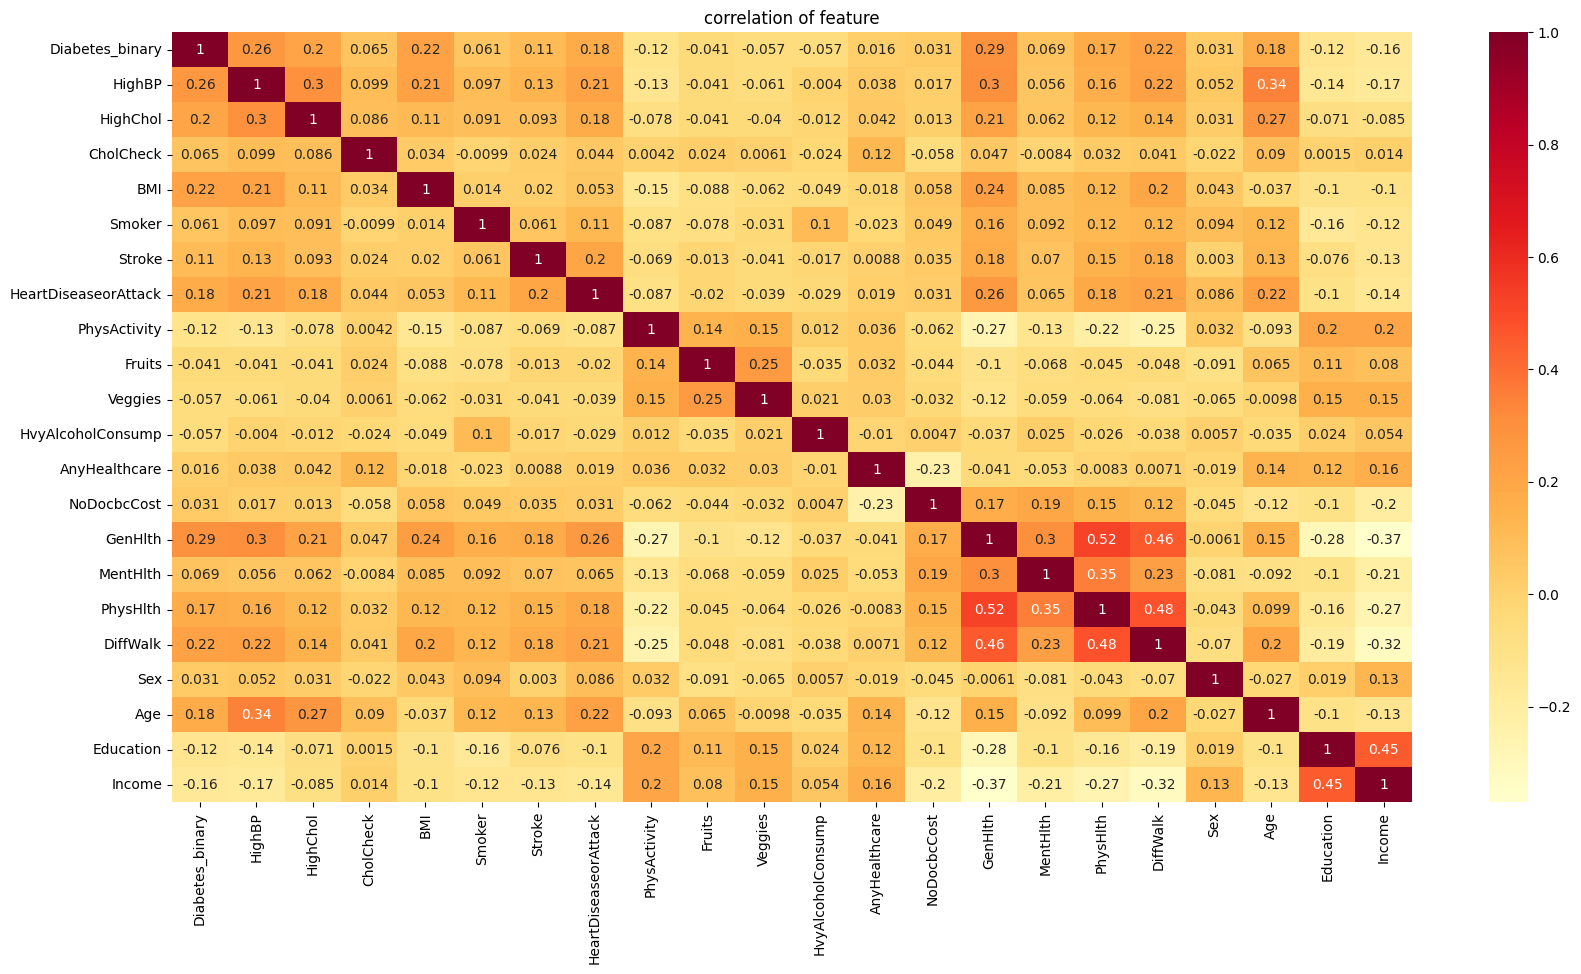

In [7]:
# Geramos un heatmap
# En orden de tener una idea general de la correlación de las variables

plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

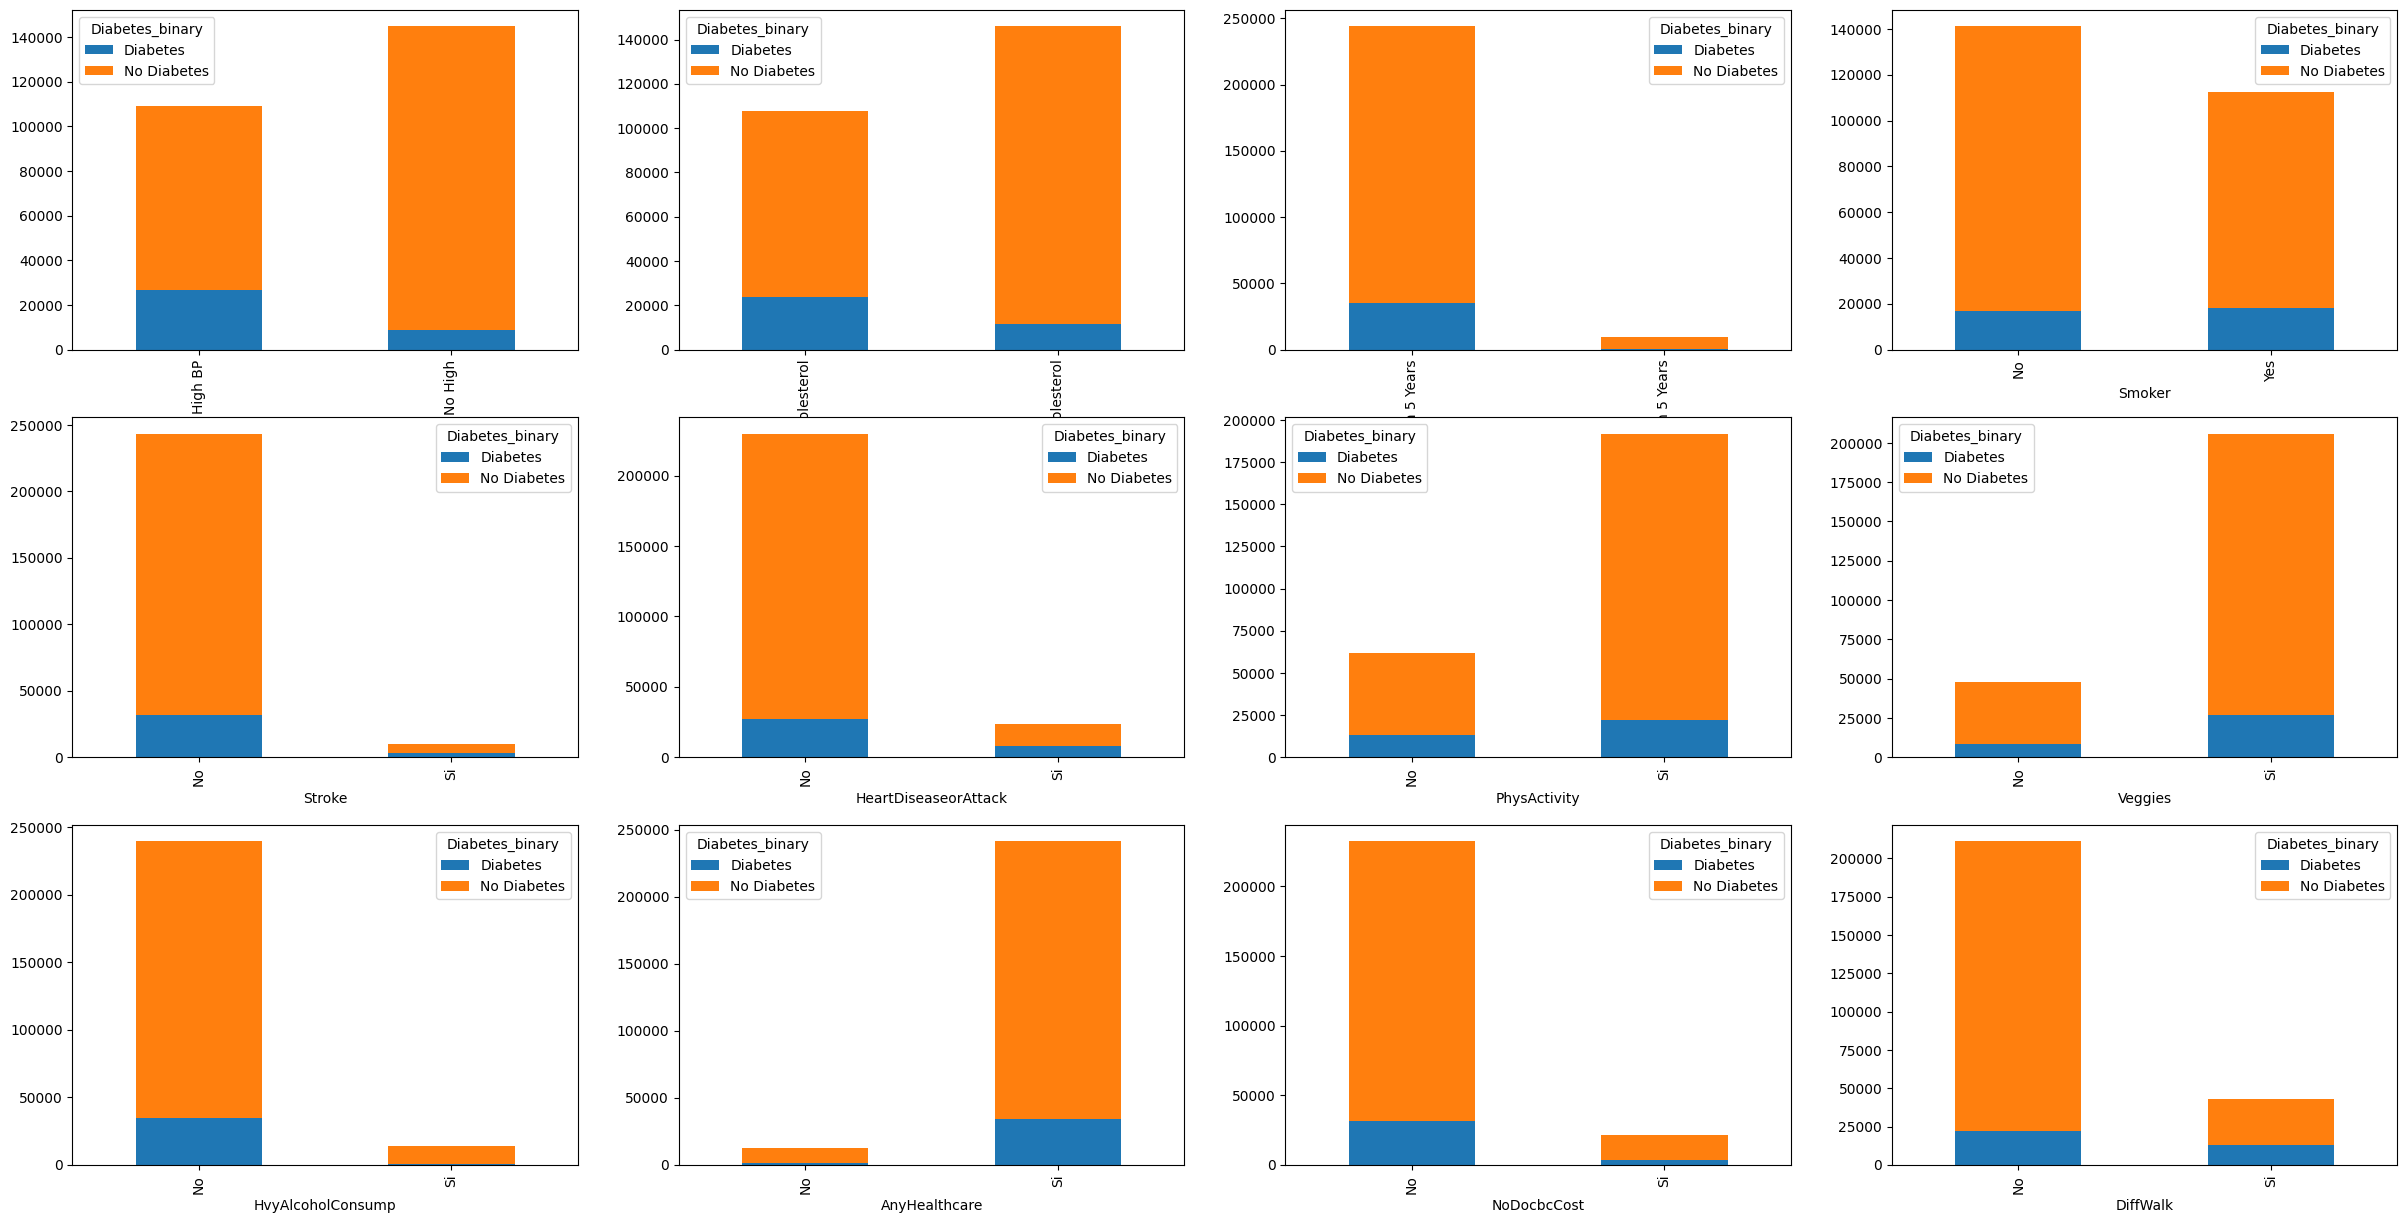

In [8]:
#Visualization de columnas [SI - NO] y su relacion con la variable objetivo:

cols = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']
def create_plot_pivot(data2, x_column):
    """ Create a pivot table for satisfaction versus another rating for easy plotting. """
    _df_plot = data2.groupby([x_column, 'Diabetes_binary']).size() \
    .reset_index().pivot(columns='Diabetes_binary', index=x_column, values=0)
    return _df_plot
fig, ax = plt.subplots(3, 4, figsize=(30,15))
axe = ax.ravel()

c = len(cols)

for i in range(c):
    create_plot_pivot(data2, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])

fig.show()

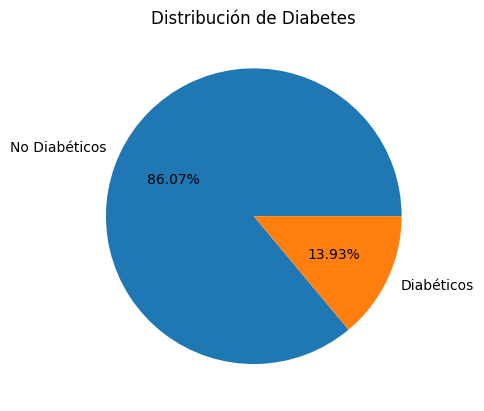

In [9]:
import matplotlib.pyplot as plt

labels = ["No Diabéticos", "Diabéticos"]

# Graficar pie chart con porcentajes
plt.pie(
    data2["Diabetes_binary"].value_counts(),
    labels=labels,
    autopct='%.2f%%'  # Esto agrega el signo de porcentaje
)
plt.title("Distribución de Diabetes")
plt.show()


La clase positiva presenta una proporción notablemente menor que la negativa. Este desequilibrio puede llevar al modelo a sobreajustarse a la clase mayoritaria y, en consecuencia, a ignorar la minoritaria. En las secciones siguientes se describen y comparan las dos estrategias de balanceo aplicadas para mitigar este problema.


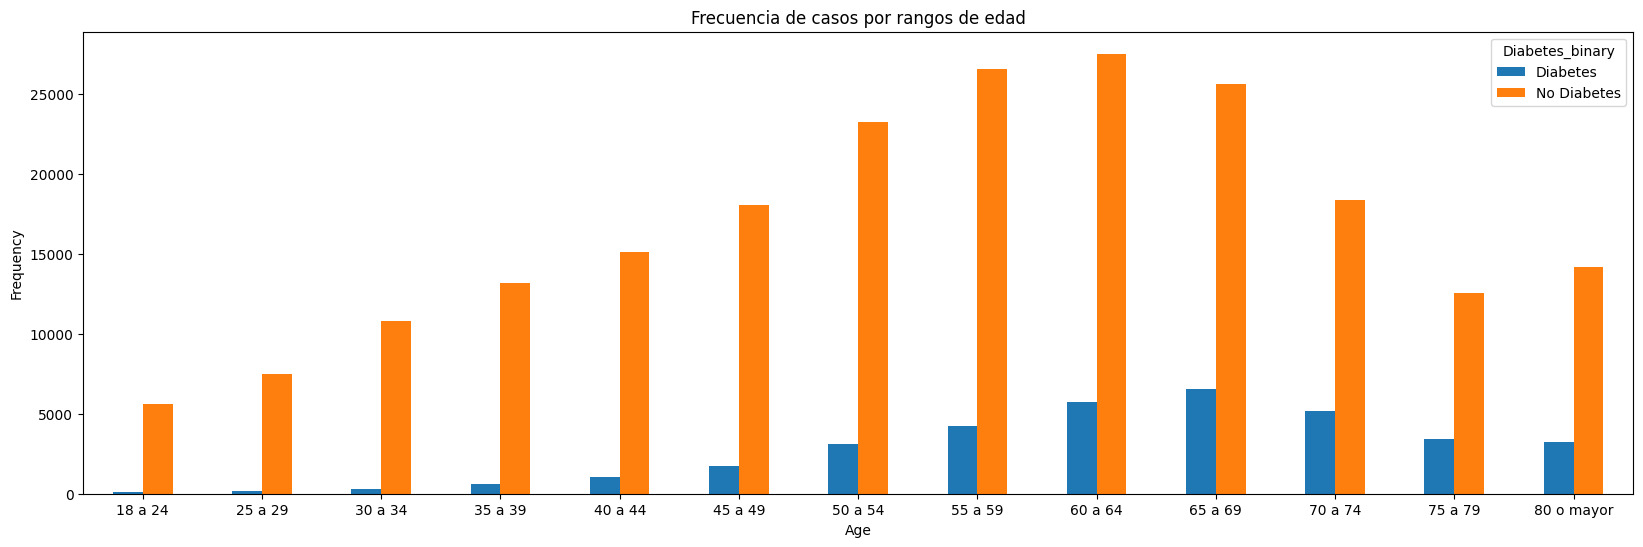

In [10]:
pd.crosstab(data2.Age,data2.Diabetes_binary).plot(kind="bar",figsize=(20,6))
plt.title('Frecuencia de casos por rangos de edad')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

Esto nos ayuda a observar que en algunos rangos de edad, la cantidad de casos postivos es mas frecuente.

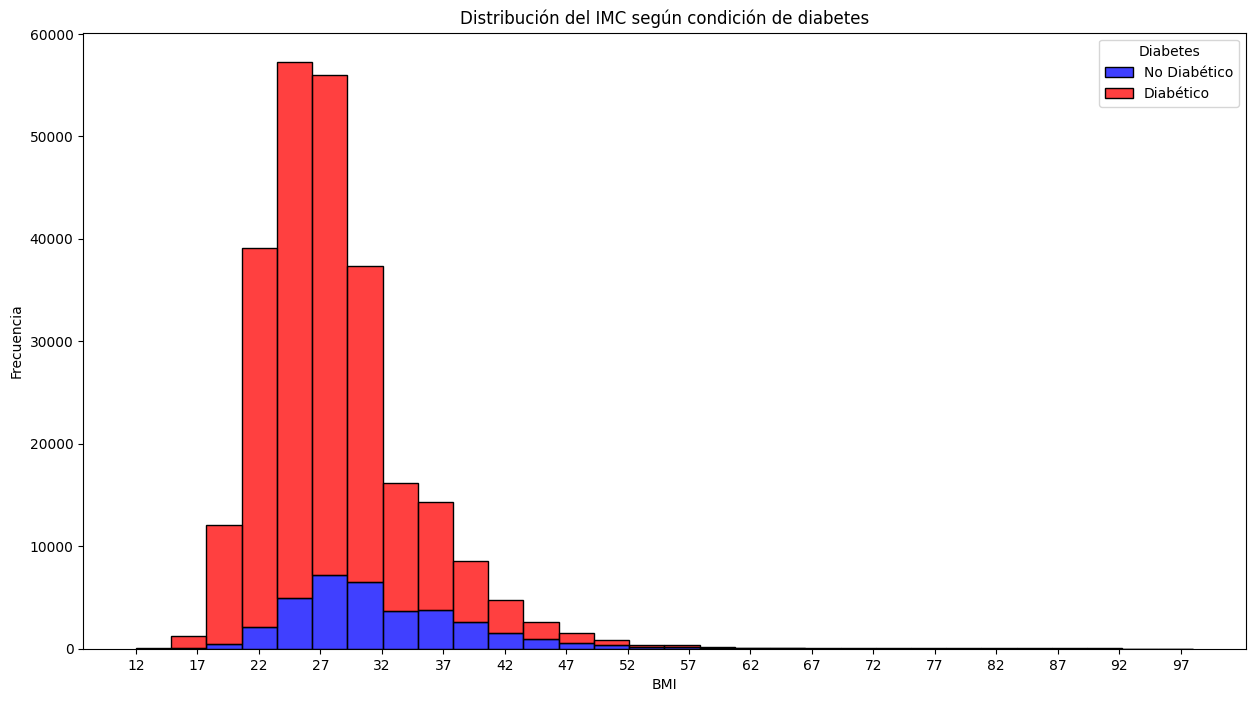

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

# Asegúrate de que BMI no tenga demasiados valores únicos (ideal si lo discretizas)
sns.histplot(data=df, x="BMI", hue="Diabetes_binary", bins=30, palette=["red", "blue"], kde=False, multiple="stack")

plt.title("Distribución del IMC según condición de diabetes")
plt.xlabel("BMI")
plt.ylabel("Frecuencia")
plt.legend(title="Diabetes", labels=["No Diabético", "Diabético"])

# Configurar ticks del eje X cada 10 unidades
min_bmi = int(df["BMI"].min())
max_bmi = int(df["BMI"].max())
plt.xticks(np.arange(min_bmi, max_bmi + 1, 5))

plt.show()



A continuación se describe el flujo de **preprocesamiento y preparación de datos** para los experimentos de clasificación.
---

### 1. Eliminación de duplicados  
Se eliminan las columnas repetidas detectadas en el *dataset*. La redundancia no aporta información adicional y, por el contrario, introduce ruido y colinealidad que pueden degradar la capacidad predictiva de los modelos.

### 2. Selección de características relevantes  
Con técnicas de filtrado (p. ej. **Information Gain**, **chi‑cuadrado**) y de envoltura (p. ej. **Recursive Feature Elimination**), se identifican las variables con mayor poder explicativo respecto a la variable objetivo. Así se reduce la dimensionalidad, se agiliza el entrenamiento y se mitiga el sobreajuste causado por atributos poco informativos.

### 3. Balanceo de clases  
El desbalance de la variable objetivo se corrige mediante tres aproximaciones complementarias:


* **SMOTE suave (sin undersampling):** Genera ejemplos sintéticos de la clase minoritaria interpolando observaciones cercanas.                               Incrementa la señal de la clase minoritaria sin eliminar datos reales; sirve como línea base para medir la ganancia de técnicas más agresivas.


* **Undersampling con K-Miss + XGBoost:** K‑Miss elimina ejemplos de la clase mayoritaria próximos a la minoritaria, luego se entrena **XGBoost**.Al depurar la frontera de decisión se obtiene un conjunto más informativo; XGBoost refuerza esta ventaja con su capacidad de *boosting* y su control de sobreajuste.


* **Undersampling + Random Forest:** Aplica muestreo aleatorio para reducir la clase mayoritaria y entrena un **Random Forest**.  El muestreo reduce la dominancia de la clase mayoritaria; la aleatoriedad del bosque mitiga la pérdida de información y aporta robustez ante ruido residual.


### 4. División del conjunto de datos  
Tras el preprocesamiento, se separan los datos en **80 % entrenamiento** y **20 % prueba**. Esta partición estándar permite evaluar objetivamente el desempeño y la generalización de cada combinación de modelo y técnica de balanceo.

---

> **Motivación de las estrategias de balanceo**  
> - **SMOTE suave** actúa como referencia “mínimamente intrusiva”: solo agrega ejemplos sintéticos, de modo que cualquier mejora posterior puede atribuirse a técnicas de muestreo más agresivas.  
> - **K‑Miss + XGBoost** ataca directamente la región de mayor confusión (la frontera de clases) y se complementa con un algoritmo de *boosting* que refina errores iterativamente. Es ideal cuando la minoría está eclipsada por ejemplos mayoritarios muy cercanos.  
> - **Undersampling + Random Forest** explota la resiliencia de los bosques aleatorios a la pérdida de datos. Al balancear por reducción, se alivia la dominancia de la clase mayoritaria sin requerir generación sintética adicional, favoreciendo interpretabilidad y velocidad de entrenamiento.

Estas tres perspectivas permiten contrastar cómo diferentes formas de reequilibrar el conjunto afectan al rendimiento, proporcionando evidencia empírica para recomendar la técnica más eficaz en escenarios futuros con desbalance de clases.

In [12]:

# 🧹 Eliminar duplicados
df = df.drop_duplicates()

# =====================
# 🧠 Separar variables
# =====================
X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]

# Chi2 necesita datos >= 0
X_chi = X.copy()
X_chi[X_chi < 0] = 0

# ===============================
# 🎯 Análisis de importancia de variables
# ===============================

# ANOVA F-score
anova_selector = SelectKBest(score_func=f_classif, k='all')
anova_selector.fit(X, y)
anova_scores = anova_selector.scores_

# Chi2
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X_chi, y)
chi2_scores = chi2_selector.scores_

# Tabla comparativa
score_df = pd.DataFrame({
    'Feature': X.columns,
    'ANOVA_F': anova_scores,
    'Chi2': chi2_scores
}).sort_values(by='Chi2', ascending=True).reset_index(drop=True)

# Mostrar las 16 más importantes
print("🎯 Variables más relevantes según ANOVA F-score:")
print(score_df.nlargest(16, 'Chi2'))

# =========================
# 📌 Seleccionar top variables
# =========================
selected_features = score_df.nlargest(16, 'ANOVA_F')['Feature'].tolist()
X_selected = X[selected_features]
print("\n📌 Top variables seleccionadas:" + str(selected_features))




🎯 Variables más relevantes según ANOVA F-score:
                 Feature       ANOVA_F          Chi2
20              PhysHlth   5739.591424  97988.761672
19                   BMI  10075.425186  15507.736174
18              MentHlth    674.908702  11419.584750
17                   Age   7444.458687   8539.906340
16                HighBP  15868.017696   8098.548237
15              DiffWalk  10097.616798   7875.496177
14               GenHlth  19061.436601   7671.732832
13  HeartDiseaseorAttack   6682.140008   5822.145697
12              HighChol   9065.177413   4869.312739
11                Income   4631.714144   3377.099257
10                Stroke   2280.282576   2156.678382
9      HvyAlcoholConsump   1002.426607    937.401148
8           PhysActivity   2336.872150    617.563886
7              Education   2445.440895    479.112939
6                 Smoker    476.133601    253.826098
5                    Sex    245.998296    137.837135

📌 Top variables seleccionadas:['GenHlth', 'HighBP'

In [13]:

from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import classification_report
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import joblib

# ==============================================================================
# 📥 1. Cargar y duplicar dataset

df = pd.read_csv("/content/drive/MyDrive/Data Diabetes/diabetes_data.csv")
df_base = df.copy()  # ← Para uso exclusivo de SMOTE

# ==============================================================================
# ✅ 2. NearMiss sobre TODO el dataset (para RF+GridSearch y XGBoost)

nm = NearMiss(version=1, n_neighbors=10)
X_nmiss, y_nmiss = nm.fit_resample(df.drop("Diabetes_binary", axis=1), df["Diabetes_binary"])

# Dividir los datos NearMiss para modelos que ya funcionaban bien con este enfoque
X_train_nmiss, X_test_nmiss, y_train_nmiss, y_test_nmiss = train_test_split(
    X_nmiss, y_nmiss, test_size=0.25, random_state=42
)

# Estos se usarán para:
# 👉 Random Forest + GridSearch
# 👉 XGBoost

# ==============================================================================
# 🔄 3. División normal para SMOTE (basado en copia original)

X_sm = df_base.drop("Diabetes_binary", axis=1)
y_sm = df_base["Diabetes_binary"]

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(
    X_sm, y_sm, test_size=0.25, stratify=y_sm, random_state=42
)

# Aplicar SMOTE solo al TRAIN
sm = SMOTE(sampling_strategy=0.7, random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train_sm, y_train_sm)

print("✅ Datos preparados correctamente para cada enfoque")

✅ Datos preparados correctamente para cada enfoque


In [14]:

from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import classification_report
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import joblib


# ===============================
# 🌲 3. Random Forest con NearMiss + GridSearch


param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [6, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True],
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='f1',
    cv=3,
    n_jobs=-1
)

# Entrenar con el dataset balanceado por NearMiss (Train completo)
grid_rf.fit(X_train_nmiss, y_train_nmiss)
best_rf = grid_rf.best_estimator_

# Evaluar sobre Test (también de NearMiss)
y_pred_rf = best_rf.predict(X_test_nmiss)
proba_rf = best_rf.predict_proba(X_test_nmiss)[:, 1]

# Guardar modelo
joblib.dump(best_rf, "best_rf.pkl")

# ===============================
# ⚙️ 4. XGBoost con NearMiss

dtrain = xgb.DMatrix(X_train_nmiss, label=y_train_nmiss)
dtest = xgb.DMatrix(X_test_nmiss, label=y_test_nmiss)

params = {
    "objective": "binary:logistic",
    "max_depth": 6,
    "eta": 0.05,
    "gamma": 2,
    "subsample": 0.8,
    "min_child_weight": 4,
    "eval_metric": ["logloss", "auc"]
}

num_round = 300
bst = xgb.train(params, dtrain, num_round)

# Guardar modelo
bst.save_model("xgboost_model.bst")

# Evaluar
y_pred_xgbs_prob = bst.predict(dtest)
y_pred_xgbs_cls = (y_pred_xgbs_prob > 0.5).astype(int)

# ===============================
# 🤖 5. Random Forest con SMOTE (solo en Train con un 70 de "agresividad")


rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

y_pred_sm = rf_smote.predict(X_test_sm)
proba_sm = rf_smote.predict_proba(X_test_sm)[:, 1]


📊 Comparativa de métricas:


                       Modelo  F1 Score  Accuracy   ROC AUC
0  RF + NearMiss + GridSearch  0.878185  0.886663  0.951107
1          XGBoost + NearMiss  0.896395  0.901941  0.956924
2            RF + SMOTE (0.7)  0.275758  0.856796  0.793859




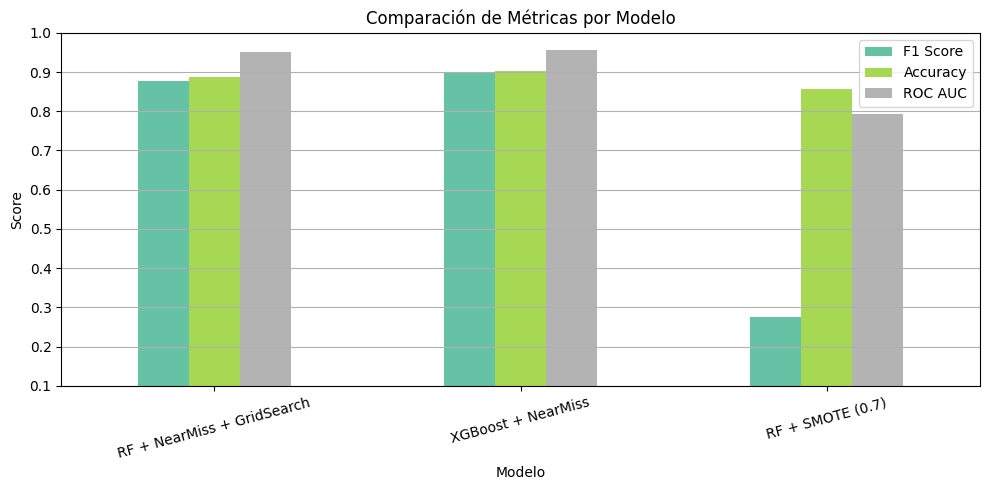

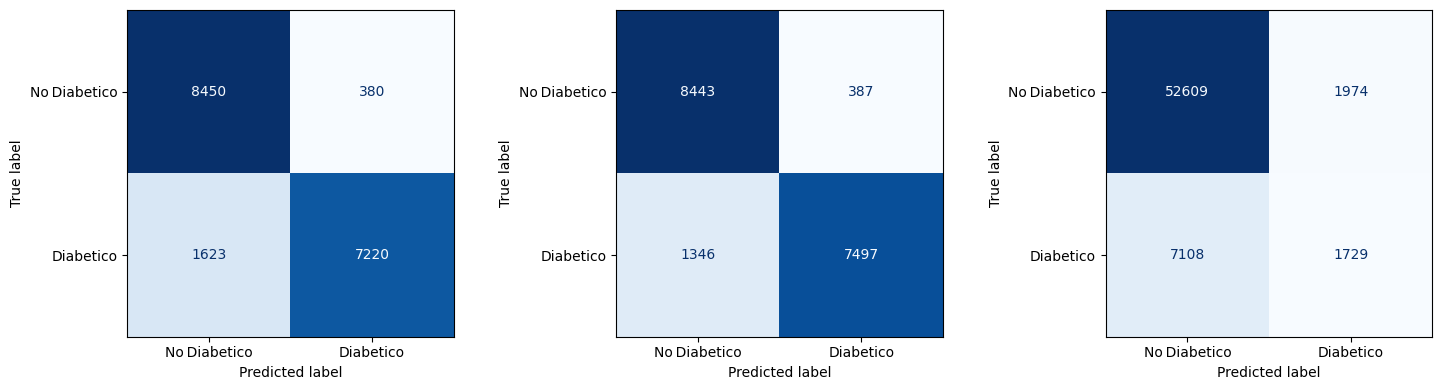

In [24]:
# ===============================
# 📊 6. Comparar resultados
# ===============================

results_df = pd.DataFrame({
    'Modelo': [
        'RF + NearMiss + GridSearch',
        'XGBoost + NearMiss',
        'RF + SMOTE (0.7)'
    ],
    'F1 Score': [
        f1_score(y_test_nmiss, y_pred_rf),
        f1_score(y_test_nmiss, y_pred_xgbs_cls),
        f1_score(y_test_sm, y_pred_sm)
    ],
    'Accuracy': [
        accuracy_score(y_test_nmiss, y_pred_rf),
        accuracy_score(y_test_nmiss, y_pred_xgbs_cls),
        accuracy_score(y_test_sm, y_pred_sm)
    ],
    'ROC AUC': [
        roc_auc_score(y_test_nmiss, proba_rf),
        roc_auc_score(y_test_nmiss, y_pred_xgbs_prob),
        roc_auc_score(y_test_sm, proba_sm)
    ]
})


print("\n📊 Comparativa de métricas:")
print("\n")
print(results_df)
print("\n")
# ===============================
# 📈 7. Gráfico de comparación
# ===============================
results_df.set_index('Modelo').plot(kind='bar', figsize=(10, 5), ylim=(0.1, 1.0), colormap='Set2')
plt.title("Comparación de Métricas por Modelo")
plt.ylabel("Score")
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1) Calcular las matrices
cm_rf   = confusion_matrix(y_test_nmiss, y_pred_rf)
cm_xgb  = confusion_matrix(y_test_nmiss, y_pred_xgbs_cls)
cm_sm   = confusion_matrix(y_test_sm,   y_pred_sm)

# 2) Graficarlas
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

ConfusionMatrixDisplay(cm_rf,  display_labels=['No Diabetico', 'Diabetico']).plot(
    ax=axes[0], cmap='Blues', colorbar=False)


ConfusionMatrixDisplay(cm_xgb, display_labels=['No Diabetico', 'Diabetico']).plot(
    ax=axes[1], cmap='Blues', colorbar=False)


ConfusionMatrixDisplay(cm_sm,  display_labels=['No Diabetico', 'Diabetico']).plot(
    ax=axes[2], cmap='Blues', colorbar=False)


plt.tight_layout()
plt.show()

In [16]:
# Ruta destino
save_path = "/content/drive/MyDrive/Data Diabetes/Models"

# Guardar cada modelo
joblib.dump(best_rf, f"{save_path}/best_rf.pkl")
joblib.dump(rf_smote, f"{save_path}/rf_smote.pkl")
bst.save_model(f"{save_path}/xgboost_model.bst")
